前言：
奥运会是最大的体育赛事之一，以夏季和冬季运动比赛为特色，来自世界各地的数千名运动员参加各种比赛，共200多个国家参加。奥运会通常每四年举行一次，四年期间每两年夏季和冬季奥运会交替举行。国际奥委会（IOC）成立于 1894 年，第一届现代奥运会于 1896 年举行。

数据：
本次报告采用的是120年的奥运历史：包括运动员的基本数据和成绩，即从 1896 年雅典到 2016 年里约的运动员基本数据和奖牌结果。
数据来源网址：https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

目的：
本次报告的目的是对过去的奥运会数据进行分析和可视化，以得出重要的见解。另外，还让想更了解奥运会过去那120年的数据的人能够轻松地进行观测，可以从这么大量的数据集里看到自己想要的资料，不用一行一行去做大量的搜索，并且能直接做出自己想要的分析。

In [1]:
#import packages 导入程序包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset 导入数据

athletes = pd.read_csv('C:/Users/user/OneDrive/Desktop/athlete_events.csv')
regions = pd.read_csv('C:/Users/user/OneDrive/Desktop/noc_regions.csv')

In [3]:
#Check dataset 1 查看第一个数据集  *NOC=国家奥林匹克委员会 National Olympic Committee
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Check dataset 2 查看第二个数据集
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Join the dataframes 合并数据集

athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
#View the number of rows and columns 查看行和列的数量
athletes_df.shape

(271116, 17)

In [7]:
#Column names consistent 使新加入的标题的首字母变成大字母

athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True);

In [8]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
#View the overall information of the data set 查看数据集的整体信息
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


描述统计：
1.运动员们的岁数介于10岁至97岁，平均年龄23.56。
2.平均身高为175.33,介于127至226cm。
3.平均体重70公斤，最轻的也有25kg，最重的是214公斤。

In [10]:
# Statistic 统计
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
#Check null values 检查空值

nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns 

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
# Print the columns containing null values or missing values in the form of a list 以列表的形式打印包含空值或缺失值的列

athletes_null_culumns = athletes_df.columns[athletes_df.isnull().any()].tolist()
athletes_null_culumns

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

通过检查空值的语句，我们除了可以发现是哪些列缺少了数据，还能知道它们对应的缺少数目。例如，Age缺少了9574个数据，Height缺少了60171个数据等。

In [14]:
#India details 印度的资料

athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
#Malaysia Details 马来西亚的资料

athletes_df.query('Team == "Malaysia"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
251,125,Zulkifli Abbas,M,28.0,170.0,62.0,Malaysia,MAS,1984 Summer,1984,Summer,Los Angeles,Hockey,Hockey Men's Hockey,NaN,Malaysia,NaN
496,276,Chairil Anwar Abdul Aziz,M,24.0,163.0,61.0,Malaysia,MAS,1996 Summer,1996,Summer,Atlanta,Hockey,Hockey Men's Hockey,NaN,Malaysia,NaN
497,276,Chairil Anwar Abdul Aziz,M,28.0,163.0,61.0,Malaysia,MAS,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Malaysia,NaN
501,278,Mohamed Abdul Hadj,M,25.0,NaN,NaN,Malaysia,MAS,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Men's Hockey,NaN,Malaysia,NaN
523,296,Zambrose Abdul Rahman,M,24.0,173.0,64.0,Malaysia,MAS,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 400 metres Hurdles,NaN,Malaysia,NaN


我们可以使用query的方式去抽取想知道的国家的运动员资料，例如我抽取了印度和马来西亚前五位运动员的数据。适合想要单独了解某一国家运动员或资料的人。

In [16]:
#Top countries participating 参与最多的国家

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

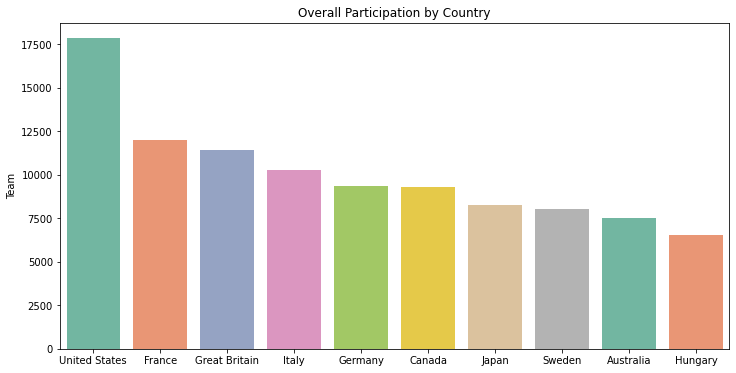

In [17]:
#Plot for the top 10 countries 前10个参与最多的国家的绘图

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index,y=top_10_countries, palette = 'Set2');

以上是前十个参与最多次奥运会的国家列表和图表。通过这种方式抽取数据，我们可以很快地了解到各个国家参与奥运会的次数，浅显易懂。例如，美国是参与次数最多的国家（17847次），依次是法国（11988次）、大不列颠（11404次）、意大利（10260次）......
接着，下面是参赛者们的年龄分布，可以看出参赛者的主力主要是在20至30岁，甚至还有不少40岁以上的参赛者。

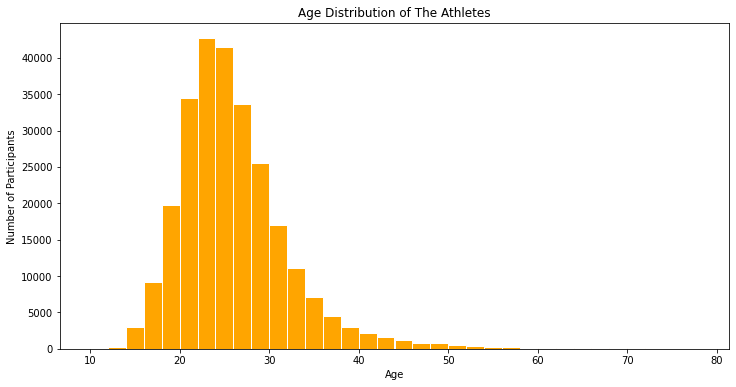

In [18]:
#Age Distribution of the participants 参赛者年龄分布

plt.figure(figsize=(12,6))
plt.title("Age Distribution of The Athletes")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color='orange',edgecolor ='white');

紧接着是不同季节的奥运会所会举办的运动项目的列表，这样分开列出来，除了可以让人瞬间分辨出什么时候会举办什么运动项目，还可以让人了解到有什么运动项目。如：冬季奥运会有速度滑冰、越野滑雪、冰球”、高山滑雪、雪橇、花样滑冰等；夏季奥运会有篮球、柔道、足球、拔河、田径、游泳、羽毛球等。

In [19]:
# Winter olympics sports 冬季奥林匹克运动会项目
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [20]:
# Summer olympics sports 夏季奥林匹克运动会项目
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

再来，我们将男女参赛者的数量分别计算出来，可以看出男性（196594人）的数量明显多于女性（74522人），足有一倍之多。通过画饼图，以颜色区分开来，我们可以了解到女性只占了27.5%,男性占了72.5%。

In [21]:
# Male and Female participants 男性和女性各别参赛者的数量

gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

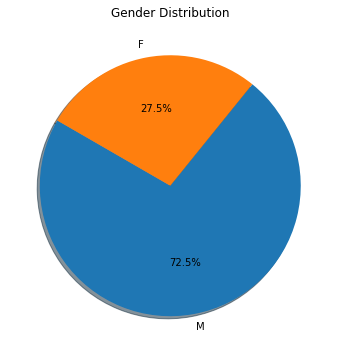

In [22]:
#Pie Plot for male and female athletes 男性和女性运动员的饼图

plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150,shadow=True);

以下是个别奖牌的数量：

In [23]:
#Total medals 个别奖牌数量

athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

下面以女运动员来做分析：
首先，先计算了每届奥运会的女运动员的数量，并输出了数据集的最后5年（2000-2016）的结果。
接着，为夏季奥运会的女运动员的总数定义一个名字，并画一个她们的计数图。我们可以很清晰地看出女运动员的数量随着年份的增长不断地增多，从1900年的33个至2016年的6223个。
最后，输出女运动员随时间变化的图，作用与上一个计数图是差不多的，但是能更清楚地看到走动的趋势。

In [24]:
#Total number of female athletes in each olympics 每届奥运会的女运动员总数

female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season== 'Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head() #head or tail
                           #female_participants.tail() 

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [25]:
#Define for the female atheletes of Summer Olympics 为夏季奥运会女运动员定义
womenOlympics = athletes_df[(athletes_df.Sex == 'F')& (athletes_df.Season== 'Summer')]

Text(0.5, 1.0, 'Female Participation')

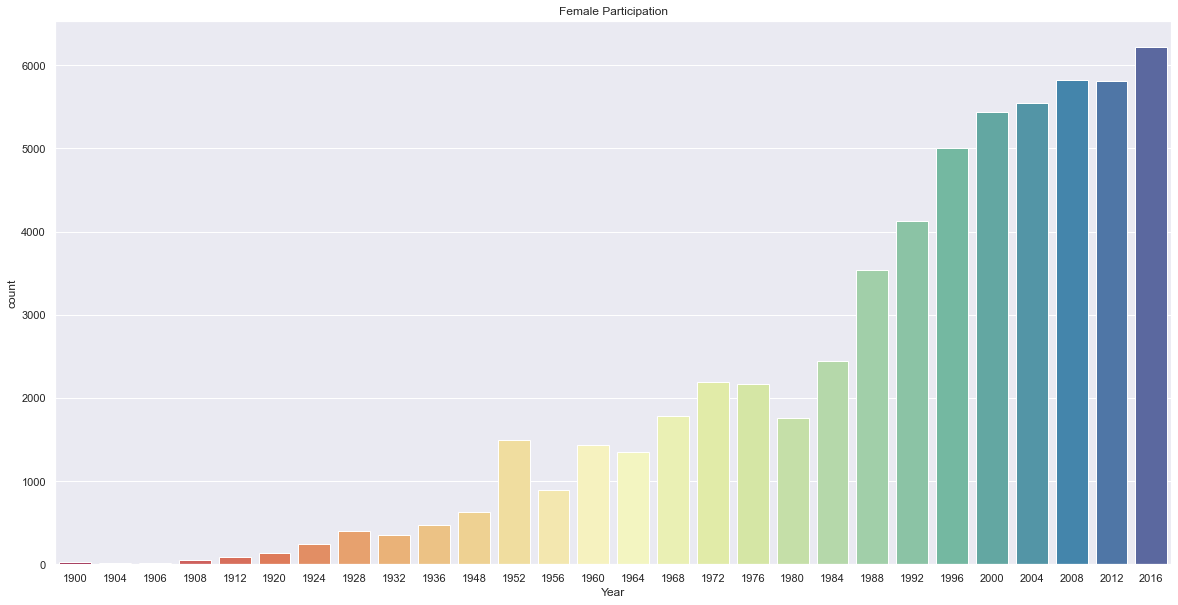

In [26]:
#Countplot for female participation 女参赛者的计数图
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=womenOlympics,palette="Spectral")
plt.title('Female Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

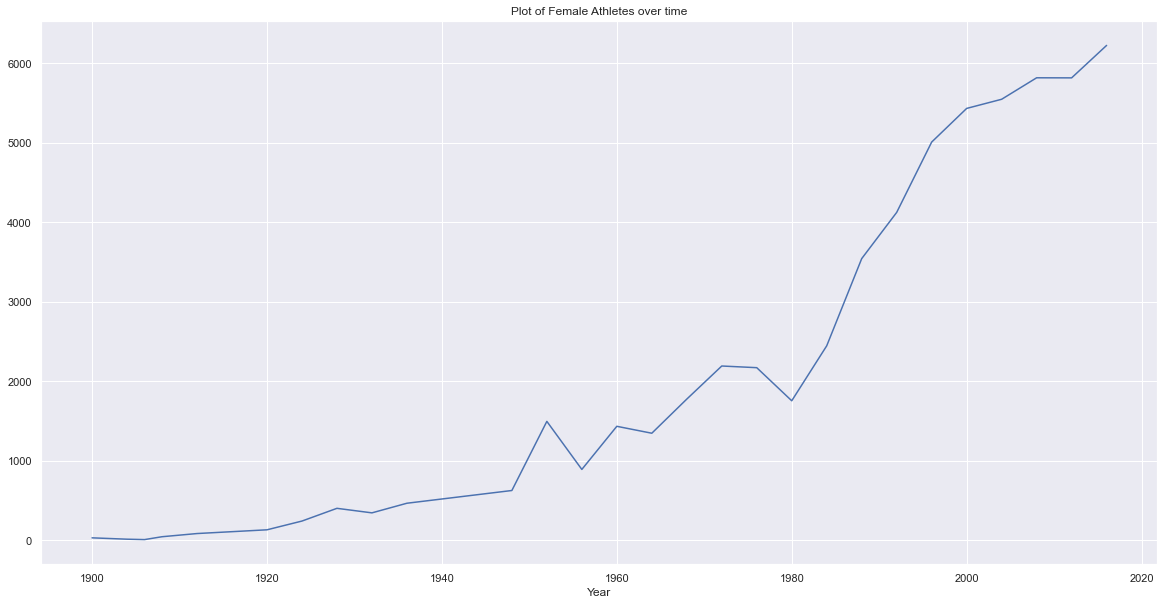

In [27]:
#Plot of Female Athletes over time 女运动员随时间变化的图
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

接下来是取金牌运动员们的资料：
1.列出数据集中前5个的金牌的选手；
2.只取与nan值不同的值；
3.计算60岁以上并且得奖了的金牌选手，共有6位；
4.检查是哪些运动项目具有60岁以上金牌得奖选手，分别是艺术比赛、短柄槌球、3次射箭、射击；
5.为上述具有60岁以上选手获得金牌的运动项目画图。

In [28]:
#Gold medal athletes 金牌运动员

goldMedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [29]:
# Take only the values that are different from NaN. 只取与 NaN 不同的值。

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [30]:
# Gold beyond 60 60岁以上获得金牌的运动员
goldMedals['ID'][goldMedals['Age']> 60].count()

6

In [31]:
# Check for which sport the 6 six gold medals have come 检查哪些运动获得了 6 枚六枚金牌

sporting_event = goldMedals['Sport'][goldMedals['Age']> 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 Years Old ')

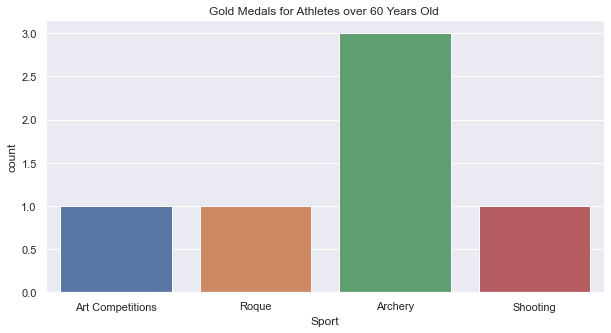

In [32]:
# Plot for sporting_event 为上述具有60岁以上选手获得金牌的运动项目画图

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title("Gold Medals for Athletes over 60 Years Old ")

以下是国家得金牌得奖次数：
1.只取了前五个国家，分别是美国（2627个）、俄罗斯（1599个）、德国（1293个）、英国（657个）和意大利（567个）；
2.为前六个国家的金牌数量作图，除了上述五个国家，还增多了法国。

In [33]:
# Gold Medals from each country  各个国家的金牌数量 （取前五个国家）

goldMedals.Region.value_counts().reset_index(name='Medal').head(5)


,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals per Country')

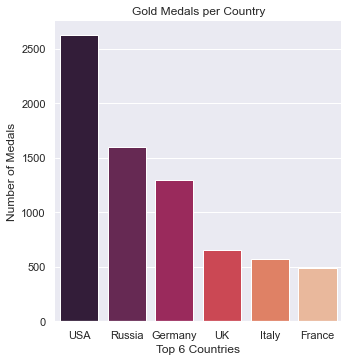

In [34]:
# Catplot for the Gold Medals per Country 为前六个国家的金牌数量作图
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
g = sns.catplot(x="index",y="Medal", data=totalGoldMedals,
               height=5, kind="bar",palette="rocket")
g.despine(left=True)
g.set_xlabels("Top 6 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals per Country")

以下为2016年里约奥运会的资料：
1.输出前10的国家的金牌数量，如美国137个、大不列颠64个、俄罗斯50个、....以此类推；
2.以条形图带出全部国家的金牌数量；
3.定义一个没有空值的奖牌数据集；
4.以(3.)中的数据集带出奥运奖牌获得者身高与体重的散点图，以颜色作分布：橙色为女运动员，蓝色为男运动员。

In [35]:
# Rio olympics 里约奥运会

max_year = athletes_df.Year.max()
print(max_year)

team_name = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

team_name.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

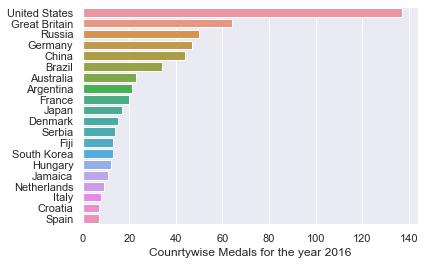

In [36]:
# Barplot for Counrtywise Medals for the year 2016  2016年全部国家奖牌的条形图
sns.barplot(x=team_name.value_counts().head(20), y=team_name.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Counrtywise Medals for the year 2016');

In [37]:
# Define a dataset for medal with no empty value 定义一个没有空值的奖牌数据集
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

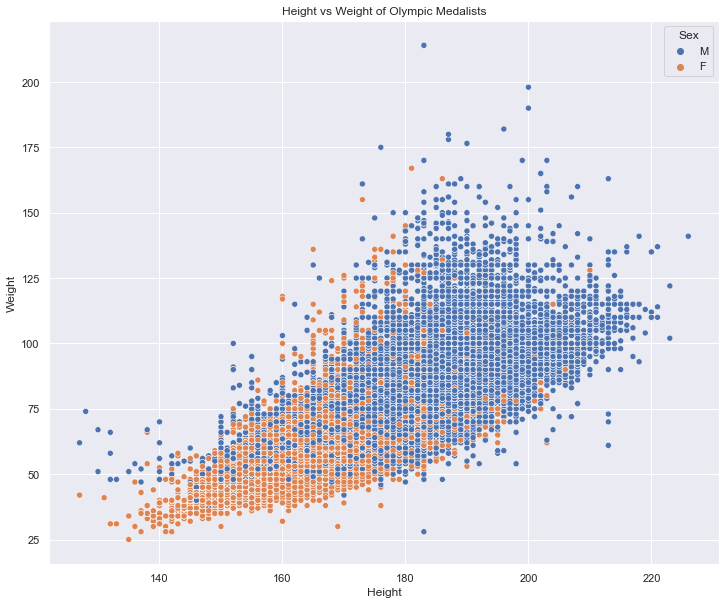

In [38]:
# Scatterplot for Height vs Weight of Olympic Medalists 奥运奖牌获得者身高与体重的散点图
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x='Height',y='Weight',data=not_null_medals,hue='Sex')
plt.title('Height vs Weight of Olympic Medalists')

以上为本次报告所做的所有分析，无论是想了解国家的得奖情况，运动员的个人资料（如身高、体重）还是比较国家之间的数据，都可以很好、很清晰地进行自己观测。总结，本次报告可以得出在（1896 年雅典到 2016 年里约）运动员们的综合描述统计，单独的国家资料（印度，马来西亚），参与最多的国家排名，参赛者年龄分布，冬季与夏季奥运会各举办的运动项目，男性和女性各别参赛者的总数量，金银铜奖牌的数量，以女运动员做的各种分析（如与年增长的女运动员数量），对金牌运动员们的分析（如60岁以上的得奖者及其得奖项目），输出前几个国家的金牌得奖次数，以及最后的里约奥运会分析。